In [ ]:
!pip install d2l

## import module

In [ ]:
%matplotlib inline
import random
import tensorflow as tf
from d2l import tensorflow as d2l

## generating datasets

In [ ]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = tf.zeros((num_examples, w.shape[0]))
    X += tf.random.normal(shape=X.shape)
    y = tf.matmul(X, tf.reshape(w, (-1, 1))) + b
    y += tf.random.normal(shape=y.shape, stddev=0.01)
    y = tf.reshape(y, (-1, 1))
    return X, y

true_w = tf.constant([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [ ]:
print('features:', features[0],'\nlabel:', labels[0])

features: tf.Tensor([0.12155996 1.9925802 ], shape=(2,), dtype=float32) 
label: tf.Tensor([-2.3365319], shape=(1,), dtype=float32)


generating a scatter plot using the second feature features[:, 1] and labels, we can clearly observe the linear correlation between the two.

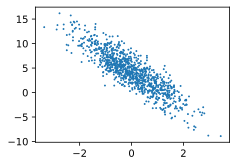

In [ ]:
d2l.set_figsize()
# The semicolon is for displaying the plot only
d2l.plt.scatter(features[:, (1)].numpy(), labels.numpy(), 1);

## reading datasets

In [ ]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = tf.constant(indices[i: min(i + batch_size, num_examples)])
        yield tf.gather(features, j), tf.gather(labels, j)

To build some intuition, let us read and print the first small batch of data examples. The shape of the features in each minibatch tells us both the minibatch size and the number of input features. Likewise, our minibatch of labels will have a shape given by batch_size.

In [ ]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tf.Tensor(
[[-0.08703338  1.3425331 ]
 [-0.28512213 -0.6612352 ]
 [ 2.4484074   0.18676141]
 [-0.1479521   0.7276389 ]
 [ 0.80541086 -0.22949335]
 [-0.8426699   1.052666  ]
 [ 0.35919812 -1.5099316 ]
 [ 0.80140793  0.08965657]
 [ 0.09261443  0.3365841 ]
 [ 0.23972313 -0.26151347]], shape=(10, 2), dtype=float32) 
 tf.Tensor(
[[-0.52916896]
 [ 5.877856  ]
 [ 8.471468  ]
 [ 1.4290341 ]
 [ 6.5868244 ]
 [-1.0633684 ]
 [10.056132  ]
 [ 5.4871044 ]
 [ 3.2219145 ]
 [ 5.5613203 ]], shape=(10, 1), dtype=float32)


As we run the iteration, we obtain distinct minibatches successively until the entire dataset has been exhausted (try this). While the iteration implemented above is good for didactic purposes, it is inefficient in ways that might get us in trouble on real problems

## initializing model parameters

initialize weights by sampling random numbers from a normal distribution with mean 0 and a standard deviation of 0.01, and setting the bias to 0

In [ ]:
w = tf.Variable(tf.random.normal(shape=(2, 1), mean=0, stddev=0.01),
                trainable=True)
b = tf.Variable(tf.zeros(1), trainable=True)

## defining the model

In [ ]:
def linreg(X, w, b):  #@save"""The linear regression model."""
    return tf.matmul(X, w) + b

## defining the lost function

In the implementation, we need to transform the true value y into the predicted value’s shape y_hat. The result returned by the following function will also have the same shape as y_hat

In [ ]:
def squared_loss(y_hat, y):  #@save"""Squared loss."""
    return (y_hat - tf.reshape(y, y_hat.shape)) ** 2 / 2

## defining the optimization algorithim

In [ ]:
def sgd(params, grads, lr, batch_size):  #@save"""Minibatch stochastic gradient descent."""
    for param, grad in zip(params, grads):
        param.assign_sub(lr*grad/batch_size)

## training

In [ ]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with tf.GradientTape() as g:
            l = loss(net(X, w, b), y)  # Minibatch loss in `X` and `y`
        # Compute gradient on l with respect to [`w`, `b`]
        dw, db = g.gradient(l, [w, b])
        # Update parameters using their gradient
        sgd([w, b], [dw, db], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(tf.reduce_mean(train_l)):f}')

epoch 1, loss 0.034832
epoch 2, loss 0.000123
epoch 3, loss 0.000048


In this case, because we synthesized the dataset ourselves, we know precisely what the true parameters are. Thus, we can evaluate our success in training by comparing the true parameters with those that we learned through our training loop. Indeed they turn out to be very close to each other.

In [ ]:
print(f'error in estimating w: {true_w - tf.reshape(w, true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: [ 0.00020039 -0.00090814]
error in estimating b: [0.00082302]
